# Importing Dependencies

In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [70]:
file_path = './data/data.csv'
data_frame = pd.read_csv(file_path)
data_frame.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,1 May 08,AM - Sales,M1,Yes,Admin Gujarat,3 Apr 12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,3 Mar 10,Sales Executive,E1,Yes,Jagdishpuram,10 Apr 12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


In [71]:
data_frame.set_index('S.No', inplace=True)
data_frame.head()

,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
S.No,,,,,,,,,,,,,,,,,,
1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
4,XYZ1679,ABC4,1 May 08,AM - Sales,M1,Yes,Admin Gujarat,3 Apr 12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
5,XYZ2378,ABC5,3 Mar 10,Sales Executive,E1,Yes,Jagdishpuram,10 Apr 12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


# Data Cleaning 

In [72]:
data_frame.dtypes

EmpID                                object
Emp Name                             object
DOJ                                  object
Designation                          object
Grade                                object
Attrition                            object
Location                             object
In Active Date                       object
Tenure                               object
Gender                               object
Education                            object
Age                                   int64
Last Rating                           int64
Monthly Income                        int64
Engagement Score (% Satisfaction)    object
Marital Status                       object
Zone                                 object
Remarks                              object
dtype: object

Fixing DOJ data type

In [73]:
data_frame[['DOJ','In Active Date']].head(10)

,DOJ,In Active Date
S.No,,
1,22-Nov-10,26-May-12
2,5-Jul-10,6-Apr-12
3,20-Oct-10,7-Apr-12
4,1 May 08,3 Apr 12
5,3 Mar 10,10 Apr 12
6,17 Nov 11,9 Apr 12
7,7 Feb 11,9 Apr 12
8,20 Oct 10,11 Apr 12
9,1 Feb 12,5 Apr 12


In [74]:
data_frame['DOJ'] = pd.to_datetime(data_frame['DOJ'])
data_frame['In Active Date'] = pd.to_datetime(data_frame['In Active Date'])
data_frame[['DOJ','In Active Date']]

C:\Users\dell\AppData\Local\Temp\ipykernel_17812\4052361076.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_frame['DOJ'] = pd.to_datetime(data_frame['DOJ'])
C:\Users\dell\AppData\Local\Temp\ipykernel_17812\4052361076.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_frame['In Active Date'] = pd.to_datetime(data_frame['In Active Date'])


,DOJ,In Active Date
S.No,,
1,2010-11-22,2012-05-26
2,2010-07-05,2012-04-06
3,2010-10-20,2012-04-07
4,2008-05-01,2012-04-03
5,2010-03-03,2012-04-10
...,...,...
323,2008-05-26,2013-03-15
324,2012-09-13,2013-03-07
325,2005-12-12,2013-03-12


In [75]:
new_names = {'DOJ':'start_date', 'In Active Date': 'end_date'}
data_frame = data_frame.rename(columns=new_names)
data_frame.dtypes

EmpID                                        object
Emp Name                                     object
start_date                           datetime64[ns]
Designation                                  object
Grade                                        object
Attrition                                    object
Location                                     object
end_date                             datetime64[ns]
Tenure                                       object
Gender                                       object
Education                                    object
Age                                           int64
Last Rating                                   int64
Monthly Income                                int64
Engagement Score (% Satisfaction)            object
Marital Status                               object
Zone                                         object
Remarks                                      object
dtype: object

In [76]:
data_frame['Grade'].isna().sum()

0

In [77]:
grade_mapping = { 'E1': 1, 'E2': 2, 'M1': 3, 'M2': 4, 'M3': 5, 'M4': 6, 'CXO': 7}
data_frame['Grade'] = data_frame['Grade'].fillna(-1) 
data_frame['grade_num'] = data_frame['Grade'].map(grade_mapping)
data_frame[['Grade', 'grade_num']]

,Grade,grade_num
S.No,,
1,E1,1
2,M2,4
3,E1,1
4,M1,3
5,E1,1
...,...,...
323,M1,3
324,E1,1
325,E2,2


In [78]:
data_frame.dtypes

EmpID                                        object
Emp Name                                     object
start_date                           datetime64[ns]
Designation                                  object
Grade                                        object
Attrition                                    object
Location                                     object
end_date                             datetime64[ns]
Tenure                                       object
Gender                                       object
Education                                    object
Age                                           int64
Last Rating                                   int64
Monthly Income                                int64
Engagement Score (% Satisfaction)            object
Marital Status                               object
Zone                                         object
Remarks                                      object
grade_num                                     int64
dtype: objec

In [79]:
data_frame['Designation'].unique()

array(['Sales Executive', 'Technical Services Officer', 'AM - Sales',
       'Sales Executive ', 'Sr Sales Executive', 'Sr Sales Executive ',
       ' Sales Executive', 'Regional Manager', 'Zonal Manager',
       'National Sales Head'], dtype=object)

In [80]:
data_frame['Designation'].isnull().sum()

0

In [81]:
role_mapping = {
    'Sales Executive': 'Sales Executive',
    'Sales Executive ' : 'Sales Executive',
    ' Sales Executive': 'Sales Executive',
    'Sr Sales Executive ' : 'Sr Sales Executive',
    'Sr Sales Executive' : 'Sr Sales Executive'
}

data_frame['Designation'] = data_frame['Designation'].replace(role_mapping, regex= True)
data_frame['Designation'].unique()

array(['Sales Executive', 'Technical Services Officer', 'AM - Sales',
       'SrSales Executive', 'Regional Manager', 'Zonal Manager',
       'National Sales Head'], dtype=object)

In [82]:
role_mapping = {
    'Sales Executive' : 1,
    'Technical Services Officer' : 2,
    'AM - Sales' : 3,
    'SrSales Executive' : 4,
    'Regional Manager' : 5,
    'Zonal Manager' : 6,
    'National Sales Head' : 7
}

data_frame['role'] = data_frame['Designation'].map(role_mapping)
data_frame[['Designation', 'role']]

,Designation,role
S.No,,
1,Sales Executive,1
2,Technical Services Officer,2
3,Sales Executive,1
4,AM - Sales,3
5,Sales Executive,1
...,...,...
323,AM - Sales,3
324,Sales Executive,1
325,SrSales Executive,4


In [88]:
data_frame.dtypes

EmpID                                        object
Emp Name                                     object
start_date                           datetime64[ns]
Designation                                  object
Grade                                        object
Attrition                                    object
Location                                     object
end_date                             datetime64[ns]
Tenure                                       object
Gender                                       object
Education                                    object
Age                                           int64
Last Rating                                   int64
Monthly Income                                int64
Engagement Score (% Satisfaction)            object
Marital Status                               object
Zone                                         object
Remarks                                      object
grade_num                                     int64
role        

In [93]:

columns_to_select = ['start_date', 'end_date', 'Last Rating', 'grade_num', 'role']

data_clean = data_frame[columns_to_select].copy()
data_clean

,start_date,end_date,Last Rating,grade_num,role
S.No,,,,,
1,2010-11-22,2012-05-26,4,1,1
2,2010-07-05,2012-04-06,2,4,2
3,2010-10-20,2012-04-07,4,1,1
4,2008-05-01,2012-04-03,2,3,3
5,2010-03-03,2012-04-10,4,1,1
...,...,...,...,...,...
323,2008-05-26,2013-03-15,2,3,3
324,2012-09-13,2013-03-07,3,1,1
325,2005-12-12,2013-03-12,1,2,4


array([[<Axes: xlabel='Last Rating', ylabel='Last Rating'>,
        <Axes: xlabel='grade_num', ylabel='Last Rating'>,
        <Axes: xlabel='role', ylabel='Last Rating'>],
       [<Axes: xlabel='Last Rating', ylabel='grade_num'>,
        <Axes: xlabel='grade_num', ylabel='grade_num'>,
        <Axes: xlabel='role', ylabel='grade_num'>],
       [<Axes: xlabel='Last Rating', ylabel='role'>,
        <Axes: xlabel='grade_num', ylabel='role'>,
        <Axes: xlabel='role', ylabel='role'>]], dtype=object)

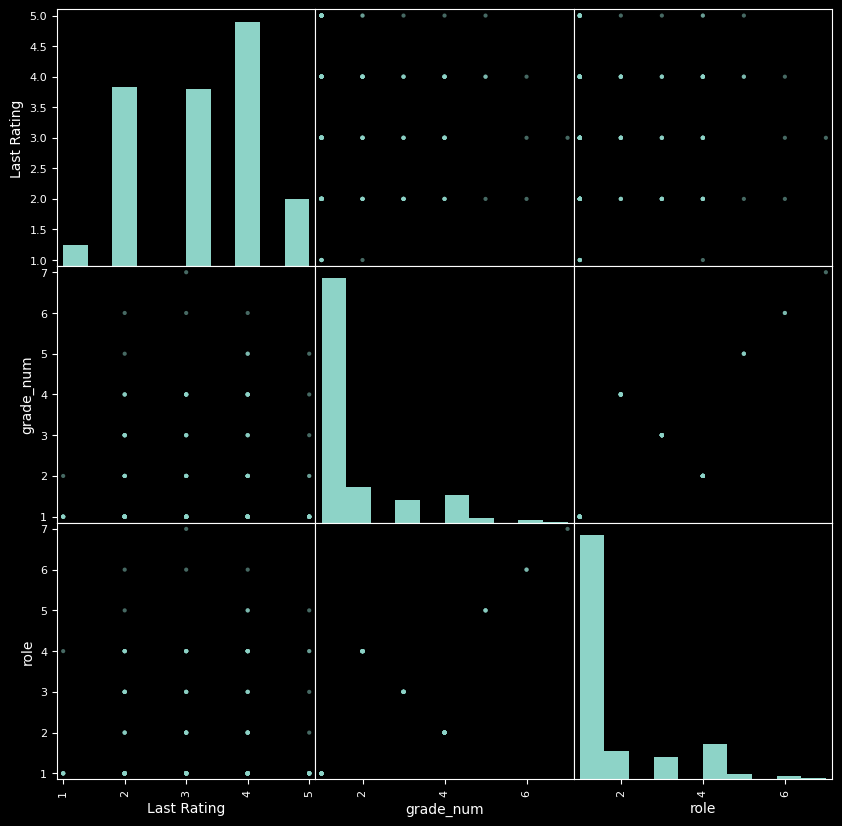

In [95]:
pd.plotting.scatter_matrix(data_clean, figsize=(10, 10))